In [2]:
run main.py

Using gpu device 3: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 4007)


Now the maxlen = 0
NO Training. Load the existed model: weights/201702212157_e100_1k1k_l0.p


In [112]:
		print "Evaluate the model using fast estimation..."
		projection1_train, projection2_train = sls.seq2vec(train_1)
		projection1_test, projection2_test = sls.seq2vec(test_1)

		sim_results_train, rank_results_train = lstm.find_ranking(projection1_train, projection2_train)
		sim_results_test, rank_results_test = lstm.find_ranking(projection1_test, projection2_test)

		print pd.Series(rank_results_train).describe()
		print pd.Series(rank_results_test).describe()

Evaluate the model using fast estimation...
count    999.000000
mean     283.343343
std      252.807385
min        1.000000
25%       77.500000
50%      208.000000
75%      450.000000
max      997.000000
dtype: float64
count    1000.000000
mean      298.797000
std       237.341098
min         1.000000
25%       108.750000
50%       245.250000
75%       437.750000
max       998.500000
dtype: float64


In [101]:
# 这里的 df_train 数据有问题，里面缺少一行，但是标号并没有变化。注意使用
df_train_1 = df_train_1.reset_index()

In [102]:
df_train_1

,index,en_article,transformation_en,jp_article,transformation_jp,similarity,dis_similarity,en2jp_projection,xa,xb,xb_wrong,pred_ranks
0,0,u.s. commerce department seasonal adjust annua...,"[5, 2, 9, 6, 6, 6, 6, 2, 6, 6]",米 商務省 発表 する 建設 支出 以下 とおり 季節調整 年率 総 建設 支出 民間 部門...,"[2, 3, 10, 7, 3, 10, 8, 8, 9, 8, 9, 3, 10, 7, ...",5.0,1.0,"[1, 8, 2, 3, 9, 7, 2, 9, 7, 2, 9, 7, 2, 9, 7, ...",2 3 10 7 3 10 8 8 9 8 9 3 10 7 5 4 7 7 2 4 9 3...,1 8 2 3 9 7 2 9 7 2 9 7 2 9 7 2 8 2 9 7 2 9 7 2,10 3 10 3 1 10 3 9 7 2 9 7 2 1 1 10 3 6 6 6 8 ...,828.0
1,1,chinese budget smartphone maker xiaomi plan se...,"[2, 6, 2, 2, 2, 1, 2, 2, 5, 6, 2, 2, 2, 2, 10,...",中国 低価格 スマホ メーカー 小米科技 () 雷軍 董事長 以上 販売 する 計画 明らか...,"[7, 5, 8, 2, 8, 3, 8, 7, 3, 8, 7, 10, 7, 7, 9,...",5.0,1.0,"[8, 2, 9, 7, 2, 8, 2, 8, 2, 8, 2, 6, 8, 2, 8, ...",7 5 8 2 8 3 8 7 3 8 7 10 7 7 9 7 3 7 3 4 7 9 3...,8 2 9 7 2 8 2 8 2 8 2 6 8 2 8 2 1 9 7 2 8 2 8 ...,10 3 10 3 6 10 3 10 8 2 6 6 10 9 7 2 1 10 10 1...,52.0
2,2,samsung electronics co ltd fell more percent t...,"[2, 2, 2, 2, 5, 5, 5, 5, 2, 5, 6, 5, 5, 5, 6, ...",ソウル 株式市場 サムスン電子 株価 超 下落 する 安値 付ける 一部 アナリスト ウォン...,"[3, 3, 3, 9, 3, 2, 7, 3, 3, 9, 9, 3, 8, 6, 8, ...",5.0,1.0,"[8, 2, 8, 2, 8, 2, 8, 2, 1, 1, 1, 1, 8, 2, 1, ...",3 3 3 9 3 2 7 3 3 9 9 3 8 6 8 10 9 10 8 8 7 8 ...,8 2 8 2 8 2 8 2 1 1 1 1 8 2 1 9 7 2 1 1 1 9 7 ...,1 1 1 1 1 4 6 6 8 2 4 10 10 10 8 2 10 1 1 4 4 ...,158.0
3,3,fiat deal gain full control chrysler group llc...,"[2, 1, 5, 1, 8, 2, 8, 10, 5, 2, 1, 5, 5, 5, 5,...",欧州 株式市場 イタリア 自動車 大手 FIAT 株価 一時 急伸 する 8月 以来 高値 ...,"[10, 3, 10, 9, 4, 6, 9, 2, 8, 7, 4, 3, 3, 3, 7...",5.0,1.0,"[8, 2, 6, 1, 6, 4, 8, 2, 4, 4, 1, 8, 2, 6, 1, ...",10 3 10 9 4 6 9 2 8 7 4 3 3 3 7 6 2 3 1 7 7 9 ...,8 2 6 1 6 4 8 2 4 4 1 8 2 6 1 1 1 1 10 3 10 3 ...,10 3 10 3 1 10 3 9 7 2 9 7 2 1 1 10 3 8 2 3 10...,362.5
4,4,fiat share jump thursday it strike deal gain f...,"[2, 1, 5, 5, 2, 8, 1, 5, 1, 8, 2, 8, 10, 7, 4,...",欧州 株式市場 イタリア 自動車 大手 FIAT 株価 一時 急伸 する 8月 以来 高値 ...,"[10, 3, 10, 9, 4, 6, 9, 2, 8, 7, 4, 3, 3, 3, 7...",5.0,1.0,"[8, 2, 6, 1, 1, 8, 2, 4, 6, 1, 6, 4, 8, 2, 4, ...",10 3 10 9 4 6 9 2 8 7 4 3 3 3 7 6 2 3 1 7 7 9 ...,8 2 6 1 1 8 2 4 6 1 6 4 8 2 4 4 10 3 10 10 3 8...,10 3 10 3 1 6 9 7 2 9 7 2 1 1 1 6 5 9 7 2 8 2 ...,372.5
5,5,u.s. treasuries price rise thursday benchmark ...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 10,...",カッコ 前 営業日 米 東部 時間 時分 前 営業日 終盤 米 東部 時間 時分 前 営業日...,"[10, 4, 3, 2, 5, 3, 4, 4, 3, 3, 2, 5, 3, 4, 4,...",5.0,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 7, 2, 1, 1, 1, ...",10 4 3 2 5 3 4 4 3 3 2 5 3 4 4 3 3 2 5 3 4 4 3...,1 1 1 1 1 1 1 1 1 9 7 2 1 1 1 9 7 2 4 1 1 1 8 ...,10 3 1 1 1 1 1 1 1 10 3 10 10 4 4 8 2 6 4 4 1 ...,164.0
6,6,auction detail see 3-year note,"[1, 1, 5, 1, 5]",米財務省 銘柄 統合 入札 実施 する 発表 する 発行 いずれ 償還 1月 11月 11月,"[6, 9, 7, 6, 4, 7, 10, 7, 6, 10, 6, 9, 8, 8]",5.0,1.0,"[6, 6, 1, 6, 1]",6 9 7 6 4 7 10 7 6 10 6 9 8 8,6 6 1 6 1,9 7 2 10 3 6 1 1 1 1 1 5 5 9 7 2 10 3 8 2 8 2 ...,994.0
7,7,brent crude sink barrel thursday libya prepare...,"[5, 5, 5, 5, 5, 8, 1, 1, 2, 8, 4, 4, 4, 2, 4, ...",原油 先物 相場 リビア 大 規模 油田 生産 停止 要因 なる いる 抗議活動 休止 する...,"[9, 3, 1, 9, 2, 9, 7, 4, 4, 9, 7, 4, 4, 4, 7, ...",5.0,1.0,"[1, 1, 1, 1, 1, 4, 6, 6, 8, 2, 4, 10, 10, 10, ...",9 3 1 9 2 9 7 4 4 9 7 4 4 4 7 9 10 7 7 4 6 7 9...,1 1 1 1 1 4 6 6 8 2 4 10 10 10 8 2 10 1 1 4 4 ...,1 8 2 1 1 1 8 2 1 1 1 1 1 1 9 7 2 1 1 1 1 1 10...,187.0
8,8,gauge u.s. factory activity hold 2-1/2-year hi...,"[5, 5, 4, 4, 7, 5, 5, 5, 2, 8, 2, 2, 9, 5, 3, ...",米 労働省 発表 する 12月 週 新規 失業保険 申請 件数 季節調整 前週 り 連続 減...,"[2, 8, 10, 7, 4, 9, 8, 8, 8, 8, 9, 3, 3, 8, 8,...",5.0,1.0,"[1, 1, 10, 10, 10, 3, 1, 1, 1, 8, 2, 4, 8, 2, ...",2 8 10 7 4 9 8 8 8 8 9 3 3 8 8 7 3 6 10 7 10 4...,1 1 10 10 10 3 1 1 1 8 2 4 8 2 8 2 3 1 5 1 10 ...,8 2 8 2 8 2 1 9 7 2 8 2 9 7 2 6 1 9 7 2 9 7 2 ...,777.0
9,9,work massive panama canal extension project ma...,"[8, 1, 8, 2, 1, 1, 7, 2, 1, 9, 5, 2, 9, 6, 9, ...",パナマ運河 拡張 工事 めぐる 建設 会社 成る 企業 連合 パナマ運河 PC コスト 超過...,"[9, 3, 9, 9, 3, 9, 4, 6, 7, 9, 2, 9, 9, 3, 5, ...",5.0,1.0,"[4, 6, 4, 

In [147]:
sim_train = sls.evaluate2(train_1,[1, 5, 10])
sim_test = sls.evaluate2(test_1,[1, 5, 10])
df_train_1['pred_ranks'] = sim_train[0]
df_test_1['pred_ranks'] = sim_test[0]
df_train_top1 = df_train_1[df_train_1['pred_ranks'] == 1]
df_test_top1 = df_test_1[df_test_1['pred_ranks'] == 1]
df_train_top5 = df_train_1[df_train_1['pred_ranks'] == 5]
df_test_top5 = df_test_1[df_test_1['pred_ranks'] == 5]
df_train_top50 = df_train_1[df_train_1['pred_ranks'] == 50]
df_test_top50 = df_test_1[df_test_1['pred_ranks'] == 50]
df_train_top100 = df_train_1[df_train_1['pred_ranks'] == 100]
df_test_top100 = df_test_1[df_test_1['pred_ranks'] == 100]

In [148]:
df_train_top50

,index,en_article,transformation_en,jp_article,transformation_jp,similarity,dis_similarity,en2jp_projection,xa,xb,xb_wrong,pred_ranks
72,72,european stock slip thursday soft chinese fren...,"[7, 5, 5, 5, 5, 2, 6, 4, 5, 7, 5, 7, 2, 6, 5, ...",欧州 株式市場 反落 中国 フランス 製造業 関連 指標 内容 なる こと 嫌気 する 利食...,"[10, 3, 9, 7, 10, 10, 10, 10, 3, 7, 9, 9, 7, 1...",5.0,1.0,"[10, 3, 1, 1, 1, 1, 8, 2, 9, 7, 2, 10, 1, 10, ...",10 3 9 7 10 10 10 10 3 7 9 9 7 10 2 9 10 6 2 3...,10 3 1 1 1 1 8 2 9 7 2 10 1 10 3 1 10 3 8 2 9 ...,8 2 9 7 2 10 10 10 3 10 1 9 7 2 9 7 2 9 7 2 1 ...,50.0
740,741,usd/jpy see good early action 104.70-78 volume...,"[5, 5, 6, 5, 8, 4, 2, 6, 5, 5, 7, 7, 2, 5, 5, ...",ドル円 後半 円 ストップ ドル 朝方 水準 売買 意欲 強まる ボリューム 日本 輸入 企...,"[9, 9, 8, 3, 2, 8, 1, 3, 10, 9, 2, 4, 3, 6, 3,...",5.0,1.0,"[1, 1, 9, 7, 2, 1, 4, 10, 8, 2, 9, 7, 2, 1, 1,...",9 9 8 3 2 8 1 3 10 9 2 4 3 6 3 6 9 9 2 9 10 7 ...,1 1 9 7 2 1 4 10 8 2 9 7 2 1 1 10 3 10 3 8 2 1...,10 1 9 7 2 10 3 3 9 7 2 5 10 1 10 3 1 10 3 9 7...,50.0
995,996,european central bank unexpected cut interest ...,"[7, 7, 5, 5, 1, 6, 6, 2, 5, 5, 5, 7, 5, 3, 5, ...",欧州中央銀行 EC 主要政策金利 据え置く 上限 金利 限界 貸出金利 下限 金利 中銀 預...,"[7, 10, 9, 10, 10, 9, 8, 8, 8, 9, 10, 8, 9, 9,...",5.0,1.0,"[10, 3, 10, 3, 1, 1, 6, 9, 7, 2, 9, 7, 2, 8, 2...",7 10 9 10 10 9 8 8 8 9 10 8 9 9 10 8 10 4 10 2...,10 3 10 3 1 1 6 9 7 2 9 7 2 8 2 1 1 1 10 3 1 5...,10 3 8 2 1 1 1 1 8 2 1 6 1 4 8 2 6 9 7 2 8 2 1...,50.0


In [106]:
i = 2
print(df_train_top1.iloc[i]['en_article'])
print(df_train_top1.iloc[i]['jp_article'])

u.s. treasury department say it dutch bidding auction 9-yr 10-mo note result 9-yr 10-mo note yield high pct median pct low pct price/acceptances price accepted high pct bid-to-cover ratio amount tendered and accepted dollar total accept total public bid tender competitive bid accept noncompetitive bid accept fed add-on note detail issued date jan. maturity date nov. cusip number dutch auction be also call uniform-price auction successful bidder pay mere price low accepted bid rather actual price they bid multiple-price auction
米財務省 よる ン 銘柄 統合 入札 ダッチ 方式 落札 結果 以下 とおり 最高 落札 利回り 平均 落札 利回り 最低 落札 利回り 落札 価格 最高 利回り 落札 カバー 応札 倍率 以下 単位 ドル 落札 総額 応札 総額 競争入札 非 競争入札 NY 連銀 地区 落札 発行 年月日 償還 年月日 番号


欧州中央銀行 EC 主要政策金利 据え置く 上限 金利 限界 貸出金利 下限 金利 中銀 預金 金利 それぞれ 据え置く 理事会 開く 記者会見 EC 総裁 発言 要旨 以下 通り ユーロ圏 危機 終わる ユーロ圏 危機 終えん する 言明 する こと こと ほか 慎重 回復 する いる の 事実 繰り返し 述べる いる よう 控えめ ぜい弱 もの 金融 経済 政治 地政学 リスク 簡単 損なう しまう 恐れ ある 利用 可能 手段 資産 買い入れ 含む 詳細 踏み込む い 両方向 物価 安定 実現 する 責務 ある 理事会 条約 認める いる すべて 手段 使用 する 用意 ある こと 明確 する い 手段 利用 する 可能性 ある 条約 認める いる すべて 手段 利用 可能 複数 利用 可能 手段 ある 手段 利用 する よう 緊急事態 生じる よる 一部 短期 金融市場 動向 容易 対応 できる もの ある ほか 中期 見通し 全般 悪化 対応 する 手段 ある め 現時点 手段 講じる の 憶測 する こと 意味 12月 インフレ率 周知 通り 昨年 12月 インフレ率 伸び 鈍化 する これ ドイツ サービス 部門 インフレ 統計 技術 調整 伴う 季節調整 ならす 進む め 一時 影響 1月 統計 これ 伴う 歪み う フォワード ガイダンス トーン 強める われわれ フォワード ガイダンス 将来 金融政策 指針 強化 示す 強める 表現 用いる 基本的 必要 ある 行動 する 決意 繰り返す もの 現在 市場 水準 妥当 考える われわれ 行動 つながる 得る 2つ 緊急事態 ある 認識 する いる ひとつ 短期 金融市場 正当 する 引き締まる ひとつ インフレ 中期 見通し 悪化 今回 トーン 強める 表現 基本的 問題 対処 する もの 短期金利 過剰流動性 水準 ユーロ圏 無担保 翌日 平均 金利 間 安定 する 関連性 見いだす 推察 する する こと 困難 強調 する い 物価 リスク 均衡 中期 物価 動向 見通し リスク 均衡 する いる 上向き リスク 商品 コモディティ 価格 上昇 予想 以上 管理 価格 上昇 間接税 もの 下方 リスク 予想 下回る 経済活動 起因 する 下方 リスク ユーロ圏 経済 見通し 取り巻く リスク 

In [57]:
projection1_train, projection2_train = sls.seq2vec(train_1)
# projection1_test, projection2_test = sls.seq2vec(test_1)

# Calculate the rankings for this data set
sim_results_train, rank_results_train = lstm.find_ranking(projection1_train, projection2_train)

In [149]:
# 【注意】比较分数时永远以日语文章为基准
# 找出63号日语文档对应的跨语言文章相似度分数
# 取前5个，发现弟
ran = sim_results_train[72].argsort()[-50:][::-1]
ran

array([117, 780, 247, 619, 373, 380, 565, 131, 157, 670, 626, 466, 372,
       282, 203, 420, 360, 668, 144, 451, 186, 527, 485, 516, 758,  63,
       114, 195, 595, 848, 177, 505, 130, 254, 204, 585, 576, 711, 261,
       558, 502, 403, 476, 433, 453, 358, 187, 785, 421,  72])

In [150]:
sim_results_train[72][ran]

array([ 0.77793676,  0.77593195,  0.77390707,  0.76693386,  0.74915195,
        0.74840385,  0.74800837,  0.74783134,  0.74783134,  0.74556404,
        0.73113662,  0.73113662,  0.73100185,  0.73100185,  0.72889447,
        0.72732395,  0.724114  ,  0.72335362,  0.72263294,  0.72139168,
        0.72086239,  0.71604705,  0.71542549,  0.71542549,  0.7131322 ,
        0.71136242,  0.7104429 ,  0.71041709,  0.70876938,  0.7075839 ,
        0.70721632,  0.70714337,  0.70707959,  0.70647091,  0.70647091,
        0.70452571,  0.70425361,  0.70381528,  0.70240486,  0.70186967,
        0.70068204,  0.69856346,  0.69828236,  0.69828236,  0.69604194,
        0.69594699,  0.69594699,  0.69390815,  0.6938765 ,  0.69368875], dtype=float32)

In [127]:
sim_results_train[856][ran]

0.66251045

In [151]:
b = 72
print(sim_results_train[b][b])
print(df_train_1.iloc[b]['en_article'])
print(df_train_1.iloc[b]['jp_article'])

for i in (ran[0], ran[1], ran[2]):
    print(sim_results_train[b][i])
    print(df_train_1.iloc[i]['en_article'])
    print(df_train_1.iloc[i]['jp_article'])

0.693689
european stock slip thursday soft chinese french manufacturing data prompt investor start new year trading cash portion lofty gain make share italian automaker fiat buck trend soar percent volume more time stock daily average it strike deal gain full control u.s. carmaker chrysler raise fresh fund ftseurofirst index top european share which gain percent end it first session percent point drop be big euro zone blue-chip euro stoxx index lose percent point it wave profit taking we re back reality year-end rally fxcm analyst nicolas cheron say all positive catalyst have be price already people be also happy mere forget negative factor today macro data be bit wake-up call investor be rattle data show china final hsbc/markit manufacturing purchase manager index pmi fall three-month low december november cement view that growth world second-biggest economy slow final quarter europe markit eurozone manufacturing purchasing manager index pmi rise december november french manufacturing

In [134]:
df_train_top100

,index,en_article,transformation_en,jp_article,transformation_jp,similarity,dis_similarity,en2jp_projection,xa,xb,xb_wrong,pred_ranks
856,857,european central bank leave it main interest r...,"[7, 7, 5, 7, 2, 7, 6, 6, 5, 5, 5, 5, 5, 7, 7, ...",欧州中央銀行 EC 主要政策金利 据え置く 上限 金利 限界 貸出金利 下限 金利 中銀 預...,"[7, 10, 9, 10, 10, 9, 8, 8, 8, 9, 10, 8, 9, 9,...",5.0,1.0,"[10, 3, 10, 3, 1, 10, 3, 8, 2, 10, 3, 9, 7, 2,...",7 10 9 10 10 9 8 8 8 9 10 8 9 9 10 8 10 4 10 2...,10 3 10 3 1 10 3 8 2 10 3 9 7 2 9 7 2 1 1 1 1 ...,10 3 10 3 1 1 9 7 2 9 7 2 1 1 1 5 8 2 1 1 9 7 ...,100.0
893,894,european central bank leave interest rate unch...,"[7, 7, 5, 7, 6, 6, 5, 5, 5, 5, 7, 9, 2, 7, 7, ...",欧州中央銀行 EC 主要政策金利 据え置く 上限 金利 限界 貸出金利 下限 金利 中銀 預...,"[7, 10, 9, 10, 10, 9, 8, 8, 8, 9, 10, 8, 9, 9,...",5.0,1.0,"[10, 3, 10, 3, 1, 10, 3, 9, 7, 2, 9, 7, 2, 1, ...",7 10 9 10 10 9 8 8 8 9 10 8 9 9 10 8 10 4 10 2...,10 3 10 3 1 10 3 9 7 2 9 7 2 1 1 1 1 10 3 3 8 ...,6 10 3 3 8 2 8 2 5 4 8 2 10 3 8 2 10 3 9 7 2 1...,100.0
998,999,european central bank leave interest rate unch...,"[7, 7, 5, 7, 6, 6, 5, 5, 7, 1, 1, 1, 2, 2, 2, ...",欧州中央銀行 EC 主要政策金利 据え置く 上限 金利 限界 貸出金利 下限 金利 中銀 預...,"[7, 10, 9, 10, 10, 9, 8, 8, 8, 9, 10, 8, 9, 9,...",5.0,1.0,"[10, 3, 10, 3, 1, 10, 3, 9, 7, 2, 9, 7, 2, 1, ...",7 10 9 10 10 9 8 8 8 9 10 8 9 9 10 8 10 4 10 2...,10 3 10 3 1 10 3 9 7 2 9 7 2 1 1 10 3 6 6 6 8 ...,8 2 6 6 10 8 2 8 2 1 10 3 1 1 10 3 10 3 10 3 4...,100.0


In [153]:
rank_results_test

[177.0,
 136.0,
 308.0,
 264.0,
 292.5,
 54.0,
 427.0,
 746.0,
 415.0,
 46.0,
 247.0,
 46.5,
 662.0,
 391.0,
 369.5,
 15.5,
 76.5,
 176.5,
 229.5,
 244.0,
 146.5,
 132.0,
 245.5,
 109.0,
 189.0,
 580.0,
 166.5,
 31.0,
 367.0,
 59.5,
 608.0,
 104.5,
 376.0,
 134.0,
 355.0,
 251.0,
 68.0,
 229.5,
 165.5,
 206.0,
 408.0,
 234.0,
 676.0,
 296.5,
 438.5,
 399.5,
 275.0,
 57.5,
 212.5,
 786.0,
 91.0,
 442.0,
 74.5,
 258.0,
 238.5,
 475.0,
 268.0,
 121.0,
 221.0,
 566.0,
 320.0,
 753.5,
 571.0,
 818.5,
 172.5,
 26.0,
 423.5,
 212.0,
 85.5,
 561.0,
 333.5,
 195.5,
 29.0,
 317.0,
 17.5,
 71.0,
 317.0,
 307.5,
 266.0,
 307.0,
 656.0,
 44.5,
 147.0,
 54.0,
 358.0,
 335.0,
 98.0,
 585.0,
 160.0,
 229.0,
 199.5,
 82.0,
 196.0,
 10.0,
 248.0,
 195.0,
 18.0,
 73.0,
 328.0,
 27.0,
 325.0,
 98.0,
 129.0,
 776.5,
 85.5,
 66.5,
 213.0,
 7.0,
 118.0,
 254.0,
 298.0,
 179.0,
 486.0,
 34.0,
 743.0,
 1.0,
 375.5,
 125.0,
 5.5,
 118.5,
 123.5,
 19.5,
 325.0,
 144.0,
 232.0,
 212.0,
 328.0,
 145.0,
 2.0,
 845.

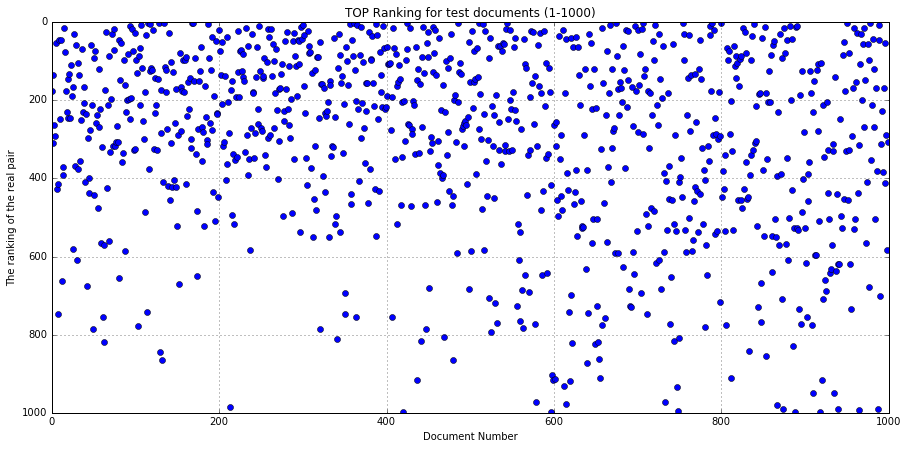

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
# matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_test,'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([1000,0])
# plt.ylim([30,0.5])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

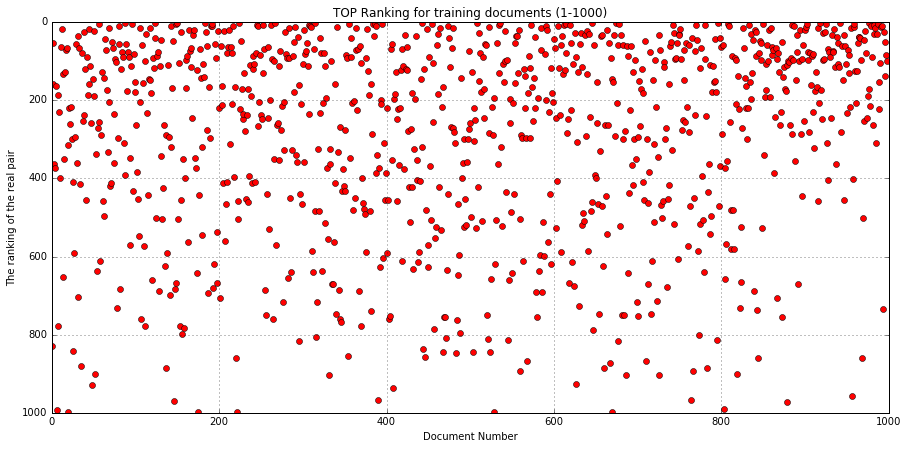

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_train,'ro')
plt.title('TOP Ranking for training documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([1000,0])
plt.grid(True)
plt.savefig('top-training.eps', format='eps', dpi=1000)
plt.show()